In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates
import numpy as np
import pandas_ta as ta

# Read in daily data for NSE TCS

In [2]:
infile = 'data/t_data.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [3]:
def alphatrend_cal(df):  
    Open = df['Open']
    Close = df['Close']
    High = df['High']
    Low = df['Low']
    Volume = df['Volume']
    ap = 14
    tr = ta.true_range(High, Low, Close)
    atr = ta.sma(tr, ap)
    noVolumeData = False
    coeff = 1
    upt = []
    downT = []
    AlphaTrend = [0.0]
    src = Close
    rsi = ta.rsi(src, 14)
    hlc3 = []
    k1 = []
    k2 = []
    mfi = ta.mfi(High, Low, Close, Volume, 14)
    for i in range(len(Close)):
        hlc3.append((High[i] + Low[i] + Close[i]) / 3)

    for i in range(len(Low)):
        if pd.isna(atr[i]):
            upt.append(0)
        else:
            upt.append(Low[i] - (atr[i] * coeff))
    for i in range(len(High)):
        if pd.isna(atr[i]):
            downT.append(0)
        else:
            downT.append(High[i] + (atr[i] * coeff))
    for i in range(1, len(Close)):
        if noVolumeData is True and rsi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])

        elif noVolumeData is False and mfi[i] >= 50:
            if upt[i] < AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(upt[i])
        else:
            if downT[i] > AlphaTrend[i - 1]:
                AlphaTrend.append(AlphaTrend[i - 1])
            else:
                AlphaTrend.append(downT[i])

    for i in range(len(AlphaTrend)):
        if i < 2:
            k2.append(0)
            k1.append(AlphaTrend[i])
        else:
            k2.append(AlphaTrend[i - 2])
            k1.append(AlphaTrend[i])

    df['k1'] = k1
    df['k2'] = k2
    return df

In [4]:
alphatrend = alphatrend_cal(df).tail(190)

In [5]:
# Data Extracted And New Variable Applied
k1 = alphatrend[['k1']]
k2 = alphatrend[['k2']]

In [6]:
fill_up = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] >= alphatrend['k2'], color = '#00E60F')
fill_down = dict(y1 = alphatrend['k1'].values, y2 = alphatrend['k2'].values, where = alphatrend['k1'] <= alphatrend['k2'], color = '#80000B')

In [7]:
ic = [
    #Alpha Trend
    mpf.make_addplot(k1,color = '#0022FC',width=3),
    mpf.make_addplot(k2,color = '#FC0400',width=3),
]

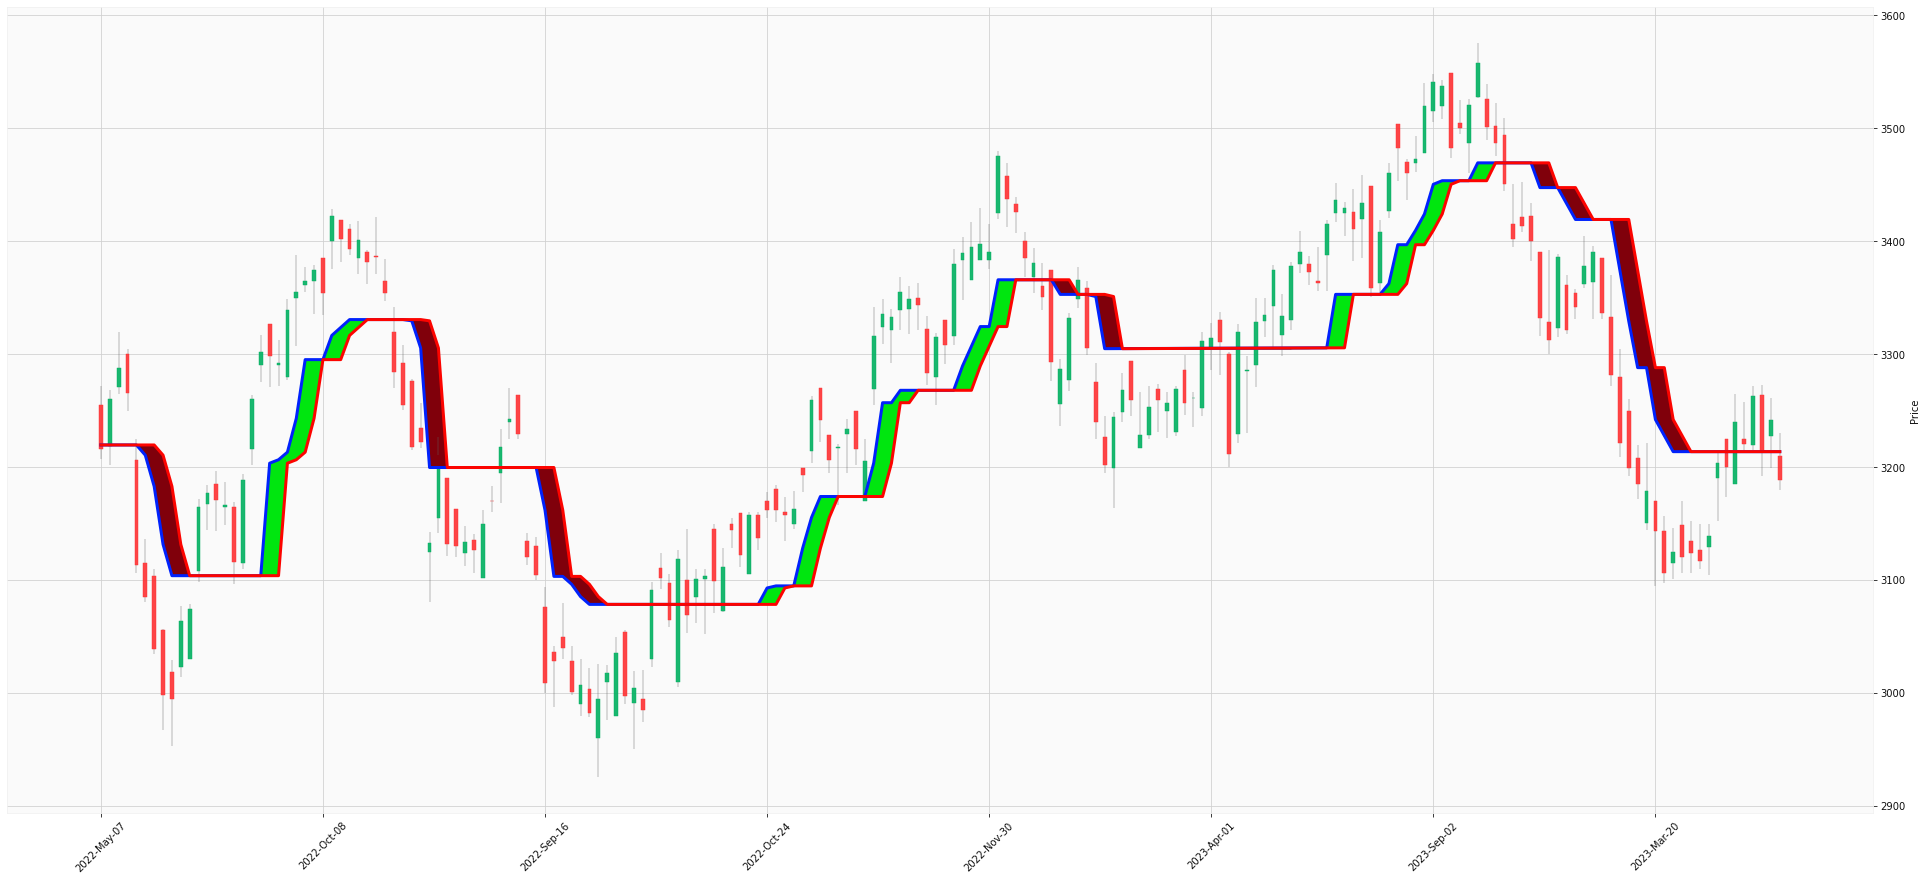

In [8]:
mpf.plot(
    df.tail(190),
    #volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figscale=1.2,
    fill_between = [fill_up,fill_down],
    figsize=(36,16,)
)